<h1 style="text-align: center; font-weight: bold;">Module-03</h1>
<h3 style="text-align: center;">Data Visualization</h3>
<h3 style="text-align: center;">DATA-6550</h3>

<h4 style="text-align: center; line-height: 1.5;">By<br><b>Richard Hoehn</b></h4>

<hr style="height:10px; border:0px; background: linear-gradient(to right, white, blue, white); margin:50px;">

# Import Libraries & Setup Constants

In [4]:
# Imports of main Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Chi-Square Test
from scipy.stats import chi2_contingency

# Handle Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#style options
%matplotlib inline

# Main Settings for Panda Display & Plotting Colors
pd.set_option('display.max_columns', 500) # Allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn-v0_8') # A style that can be used for plots

# Constants - General Use
DEV_SIZE  = 1 # Development Size of Dataset
RND       = 42  # Randome Init
TEST_SIZE = 0.3 # Size of Training Data Used
STARS     = 50  # Sapcer for comments

In [5]:
#---------------------------------------------------------
#--- Date Loading into Single Dataframe
#---------------------------------------------------------

# 01 - Import
print("Importing Data")
print("*"*STARS)
df = pd.read_csv('../../Data/titanic.csv')

# 02 - Display Row Count
print(f"Titanic Data => {df.shape[0]:,.0f} Rows")
print("*"*STARS)

# 03 - Show DataFrame
display(df.head(10))

Importing Data
**************************************************
Titanic Data => 891 Rows
**************************************************


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
#---------------------------------------------------------
#--- Fromatting & Cleaning
#---------------------------------------------------------

# 01 - Round Age
df['age'] = df['age'].round()

# 02 - Round Fare
df['fare'] = df['fare'].round()


## Analiys

Working on finding themse for a bad visualization.

**************************************************
Percentage of Embark Town


embark_town
Southampton    72.440945
Cherbourg      18.897638
Queenstown      8.661417
Name: proportion, dtype: float64

**************************************************


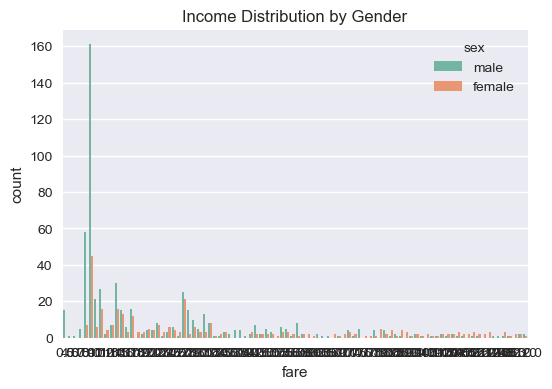

In [8]:
#---------------------------------------------------------
#--- Data & Visualizations
#---------------------------------------------------------

# 01 - Checking class balance for Embark Town
print("*"*STARS)
print("Percentage of Embark Town")
display(df['embark_town'].value_counts(normalize=True) * 100)
print("*"*STARS)

# 02 - Show it as a Grpah
plt.figure(figsize=(6, 4))
sns.countplot(x='fare', hue='sex', data=df, palette='Set2')
plt.title('Income Distribution by Gender')
plt.show()


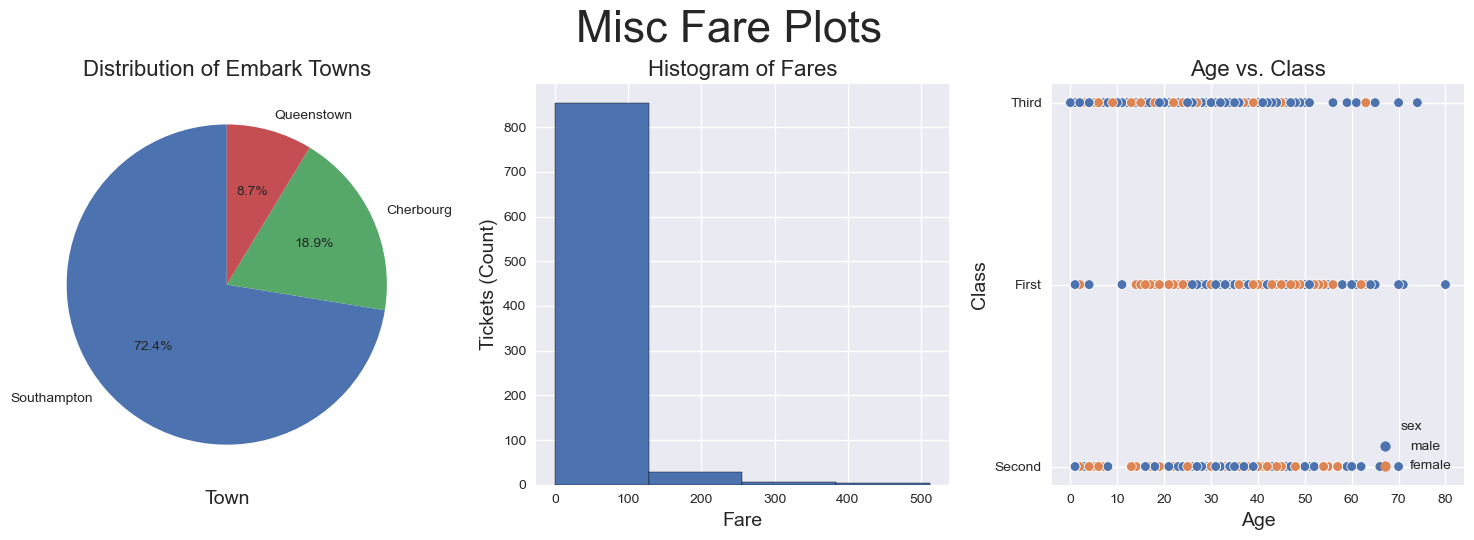

In [9]:
# Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 01 - Calculate the distribution of Embark Town
embark_counts = df['embark_town'].value_counts()

# 02 - Histogram Embark Town pie
axs[0].pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title(f'Distribution of Embark Towns', fontsize=16)
axs[0].set_xlabel('Town', fontsize=14)

# 03 - Histogram Fare
axs[1].hist(df['fare'], bins=4, edgecolor='black')
axs[1].set_title('Histogram of Fares', fontsize=16)
axs[1].set_xlabel('Fare', fontsize=14)
axs[1].set_ylabel('Tickets (Count)', fontsize=14)

# 04 - Scatter of Age vs. Class
sns.scatterplot(data=df, x='age', y='class', hue='sex', ax=axs[2], palette="deep")
axs[2].set_title(f'Age vs. Class', fontsize=16)
axs[2].set_xlabel('Age', fontsize=14)
axs[2].set_ylabel('Class', fontsize=14)
axs[2].grid(True)

# 05 - Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Misc Fare Plots', fontsize=32, y=1.07)
plt.savefig("plot_fares.png", bbox_inches = "tight")
plt.show()

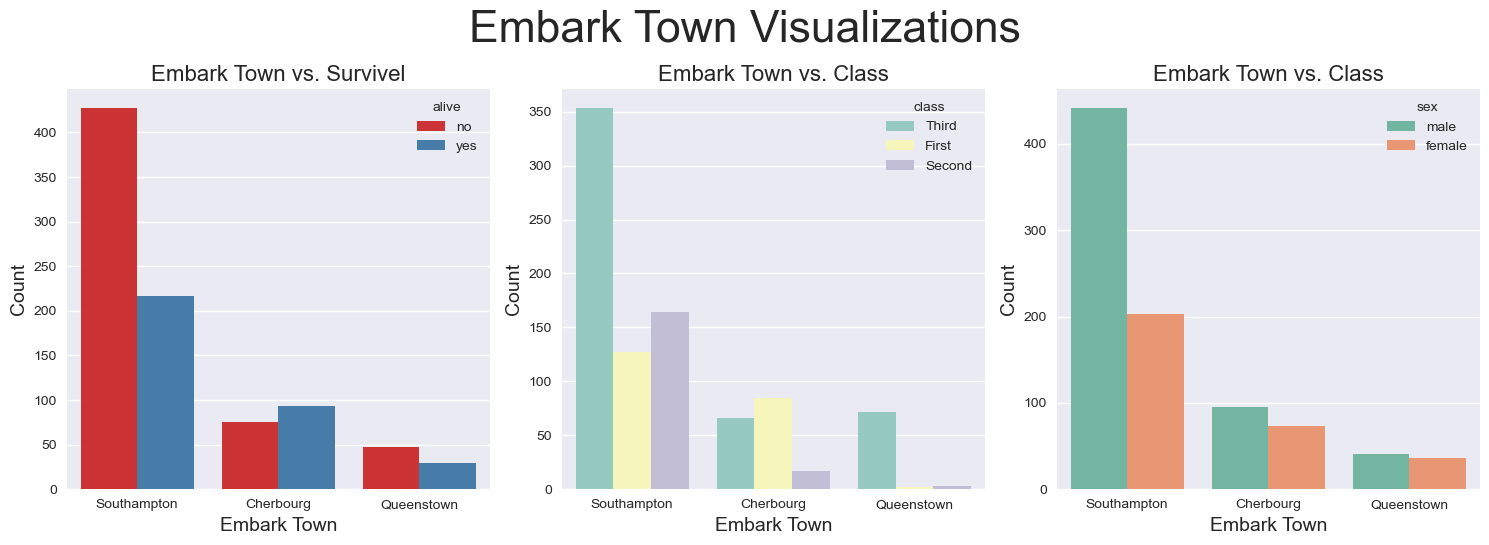

In [10]:
# 01 - Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 02 - Embark Town vs. Survivel
sns.countplot(x='embark_town', hue='alive', data=df, palette='Set1', ax=axs[0])
axs[0].set_title('Embark Town vs. Survivel', fontsize=16)
axs[0].set_xlabel('Embark Town', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# 03 - Embark Town vs. Fare
sns.countplot(x='embark_town', hue='class', data=df, palette='Set3', ax=axs[1])
axs[1].set_title('Embark Town vs. Class', fontsize=16)
axs[1].set_xlabel('Embark Town', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)

# 04 - Embark Town vs. Gender
sns.countplot(x='embark_town', hue='sex', data=df, palette='Set2', ax=axs[2])
axs[2].set_title('Embark Town vs. Class', fontsize=16)
axs[2].set_xlabel('Embark Town', fontsize=14)
axs[2].set_ylabel('Count', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Embark Town Visualizations', fontsize=32, y=1.08)
plt.savefig("plot_embark_town.png", bbox_inches = "tight")
plt.show()

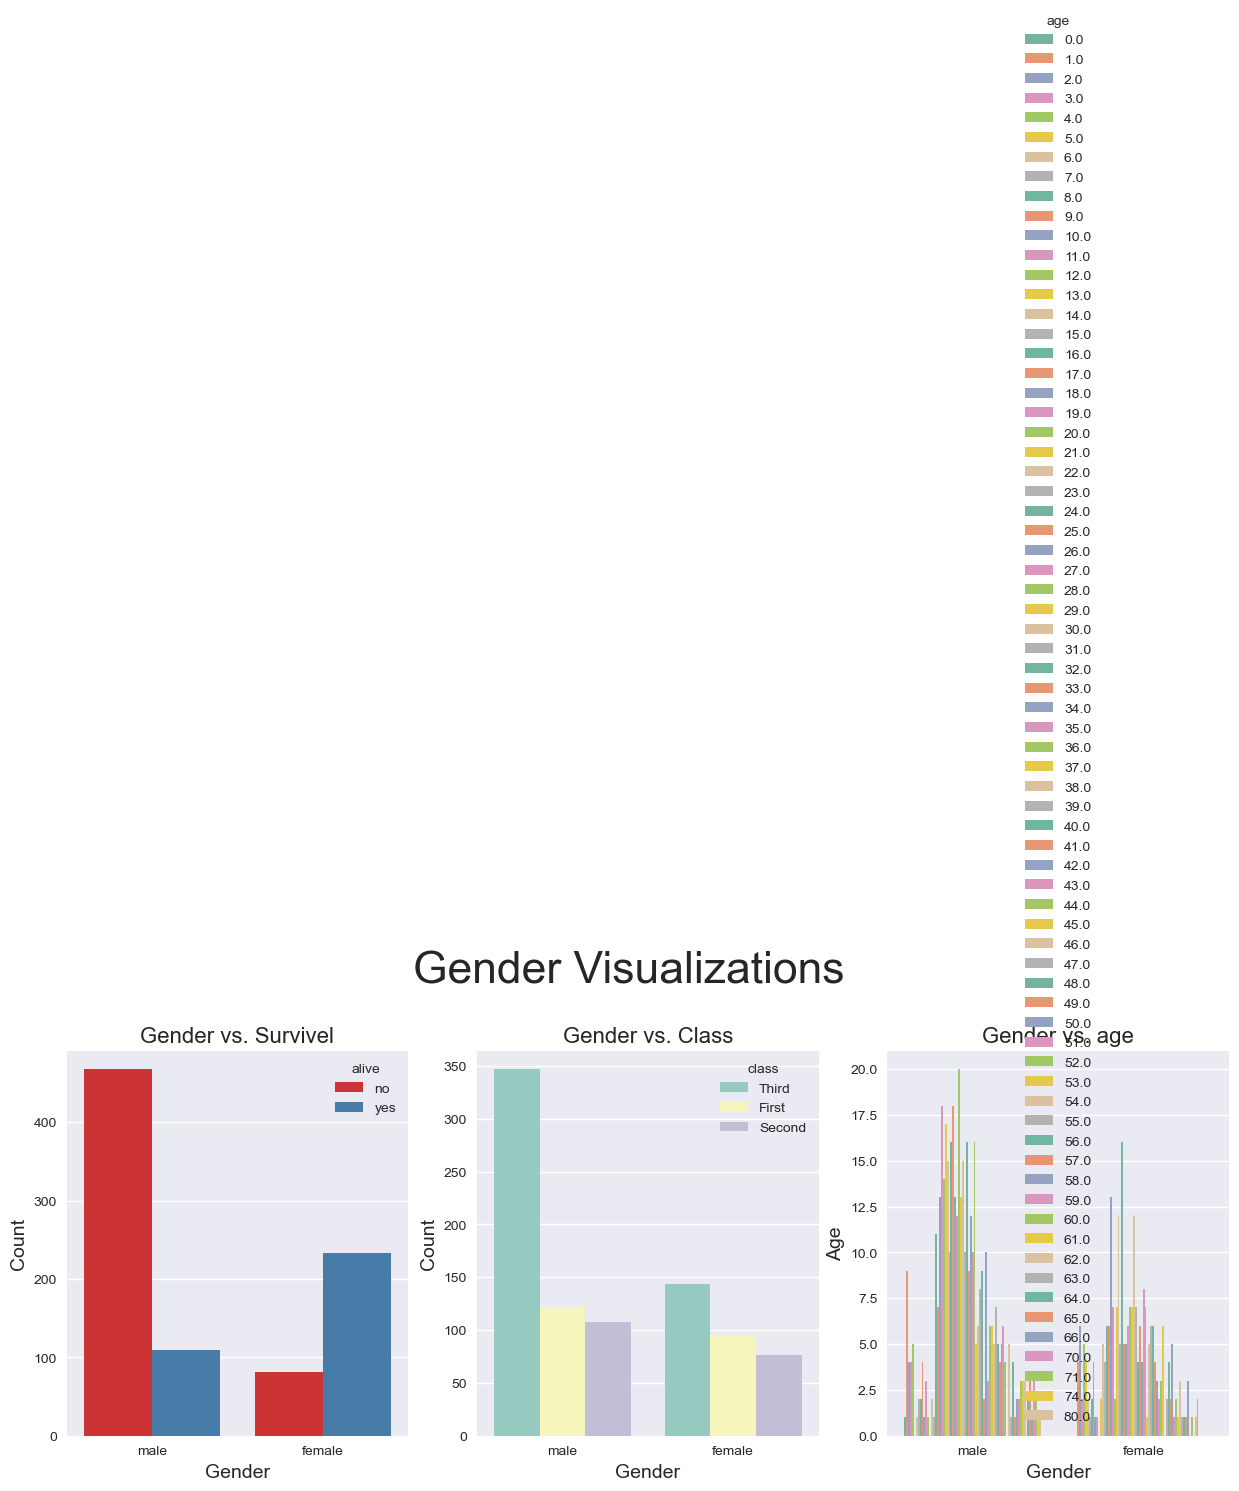

In [11]:
# 01 - Create Residuals Analisis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 02 - Embark Town vs. Survivel
sns.countplot(x='sex', hue='alive', data=df, palette='Set1', ax=axs[0])
axs[0].set_title('Gender vs. Survivel', fontsize=16)
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# 03 - Embark Town vs. Fare
sns.countplot(x='sex', hue='class', data=df, palette='Set3', ax=axs[1])
axs[1].set_title('Gender vs. Class', fontsize=16)
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)

# 04 - Embark Town vs. Gender
sns.countplot(x='sex', hue='age', data=df, palette='Set2', ax=axs[2])
axs[2].set_title('Gender vs. age', fontsize=16)
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Age', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Gender Visualizations', fontsize=32, y=1.08)
plt.savefig("plot_gender.png", bbox_inches = "tight")
plt.show()